<a href="https://colab.research.google.com/github/hazal-hk/akbank-veri-analizi-bootcamp/blob/main/Adult_Income_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Giriş**

Günümüzde, toplumlar üzerinde birçok faktörün etkisi altında kalarak yaşamlarını sürdürmektedirler. Bu faktörlerden biri de bireylerin eğitim seviyeleri ile gelir düzeyleri arasındaki ilişkidir. Eğitim seviyesi, bir bireyin sahip olduğu bilgi, beceri ve niteliklerin bir göstergesi olarak kabul edilirken, gelir düzeyi ise ekonomik refahın bir yansımasıdır.

Bu bağlamda, bu raporun amacı, farklı eğitim seviyelerine sahip bireylerin gelir dağılımlarını incelemektir. Bu inceleme, eğitim seviyesi ile gelir arasındaki ilişkinin nasıl değiştiğini anlamak ve eğitim politikalarının ekonomik fırsatlar üzerindeki etkisini değerlendirmek için önemlidir.

Raporun devamında, veri setinde yer alan farklı demografik değişkenlere odaklanarak eğitim seviyesi ile gelir arasındaki ilişkiyi görselleştireceğiz. Analizlerimizde, yaş, meslek, ilişki durumu gibi faktörlerin gelir üzerindeki etkisini de göz önünde bulunduracağız.

Sonuç olarak, bu rapor, eğitimin bireylerin ekonomik durumunu nasıl etkilediğini anlamamıza ve bu bilgiler ışığında daha adil ve sürdürülebilir politikalar geliştirmemize yardımcı olacaktır.

**Veri Açıklaması**

**1.yaş**: Bireyin yaşı.

**2.çalışma sınıfı**:Bireyin ait olduğu çalışma sınıfı (Örneğin, Özel, Serbest-çalışan-değil, Serbest-çalışan, Federal-devlet, Yerel-devlet, Eyalet-devlet, Ücretli-çalışmayan, Hiç-çalışmamış).

**3.fnlwgt**: Son ağırlık. Bu, sayımın girişin temsil ettiği insan sayısını düşündüğü sayıdır.
eğitim: Bireyin elde ettiği en yüksek eğitim seviyesi (Örneğin, Lisans, Bazı-kolej, 11. sınıf, Lise-mezunu, Profesyonel-okul, Assoc-acdm, Assoc-voc, 9. sınıf, 7-8. sınıf, 12. sınıf, Yüksek-lisans, 1-4. sınıf, 10. sınıf, Doktora, 5-6. sınıf, Okul-öncesi).

**4.eğitim-sayısı**: Eğitim seviyesinin sayısal temsili.
medeni-durum: Bireyin medeni durumu (Örneğin, Evli-sivil-eş, Boşanmış, Hiç-evlenmemiş, Ayrılmış, Dul, Eşi-ile-evli, Eşi-ile-askeri-evli).
meslek: Bireyin mesleği (Örneğin, Teknoloji-destek, El-sanatları-onarımı, Diğer-hizmet, Satış, Yönetici-yönetici, Profesyonel-uzmanlık, İşçi-temizleyici, Makine-operatörü-inceleme, Yönetsel-klasör, Tarım-balıkçılık, Taşıma-hareket, Özel-ev-hizmeti, Koruma-hizmeti, Silahlı-kuvvetler).

**5.ilişki:** Bireyin ilişki durumu (Örneğin, Eş, Kendi-çocuk, Eş, Aile-dışı, Diğer-akraba, Evlenmemiş).

**6.ırk:** Bireyin ırkı (Örneğin, Beyaz, Asyalı-Pasifik-Adalı, Amer-İndiyen-Eskimo, Diğer, Siyah).
cinsiyet: Bireyin cinsiyeti (Erkek veya Kadın).

**7.sermaye-kazancı:** Bireyin sermaye kazancı.

**8.sermaye-kaybı:** Bireyin sermaye kaybı.
haftalık-çalışma-saati: Haftalık çalışma saati.

**9.doğum-yeri:** Bireyin doğum ülkesi.

**10.gelir:** Bireyin gelir düzeyi (<=50K veya >50K).
Bu veri kümesi, sıklıkla sınıflandırma gibi görevler için kullanılır, burada amacımız sağlanan özelliklere dayanarak bir bireyin gelirinin 50.000 doları aşıp aşmadığını tahmin etmektir.

**Kullanılan Analizler:**

1.   Genel Gelir Dağılımı Analizi
2.   Yaş Gruplarına Göre Gelir
Dağılımının Analizi
1.   Eğitim Seviyelerine Göre Gelir Dağılımı Analizi
2.   İlişki Durumunun Gelir Düzeyi Üzerindeki Etkisinin Değerlendirilmesi

1.   Irklara Göre Gelir Dağılımının Analizi
2.   Mesleklerin Gelir Dağılımı Üzerindeki Etkisinin İncelenmesi

1.   Korelasyon Tablosu Analizi



**Import Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

# ************** DATA MANIPULATION *****************

import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression

# ************* METRICS ****************************

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook')

**Load and Check Data**

In [2]:
df = pd.read_csv("/adult.csv")

**Veri Setini İnceleme**

In [3]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("\n##################### Columns #####################")
    print(dataframe.columns)
    print("\n##################### Info #####################")
    dataframe.info()
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head())
    print("##################### Tail #####################")
    print(dataframe.tail())
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

In [4]:
check_df(df)

##################### Shape #####################
(32561, 15)

##################### Columns #####################
Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-nul

In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
def column_detection(dataframe: pd.DataFrame, cat_th: int = 10, car_th: int = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                       dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                    dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print("\n##################### Categoric #####################")
    print(cat_cols)
    print("\n##################### Numeric #####################")
    print(num_cols)
    print("\n##################### Categoric But Cardinal #####################")
    print(cat_but_car)
    print("\n##################### Numeric But Categoric #####################")
    print(num_but_cat)
    print("\n##################### Columns Overview #####################")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [7]:
cat_cols, num_cols, cat_but_car, num_but_cat = column_detection(df)


##################### Categoric #####################
['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'income']

##################### Numeric #####################
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

##################### Categoric But Cardinal #####################
['native.country']

##################### Numeric But Categoric #####################
[]

##################### Columns Overview #####################
Observations: 32561
Variables: 15
cat_cols: 8
num_cols: 6
cat_but_car: 1
num_but_cat: 0


Kategorik ve Sayısal Değişkenlerin Görselleştirilmesi

**Gelir Dağılımı**

Bu bölümde, veri setindeki bireylerin gelir düzeylerini incelemek için bir çubuk grafiği kullanarak gelir dağılımını görselleştirdik. Amacımız, veri setindeki gelir düzeylerinin nasıl dağıldığına dair bir anlayış elde etmekti.

Seaborn kütüphanesinin barplot() fonksiyonunu kullanarak, gelir düzeylerini görselleştirdik. Bu fonksiyon, her bir gelir düzeyinin yüzdesini hesaplayarak çubuk grafikte göstermemizi sağlar.

İlk olarak, veri setindeki gelir düzeylerinin yüzdesini hesaplamak için value_counts() fonksiyonunu kullandık. Bu fonksiyon, her bir gelir düzeyinin veri setinde ne sıklıkla görüldüğünü sayar. Ardından, bu değerleri toplam birey sayısına bölerek yüzde olarak ifade ettik.

Elde ettiğimiz yüzdelik değerleri, her bir bar üzerine yazdırmak için annotate() fonksiyonunu kullandık. Bu, grafikte her bir gelir düzeyinin yüzdesinin açıkça görünmesini sağlar.

Sonuç olarak, oluşturduğumuz çubuk grafiği, veri setindeki bireylerin gelir dağılımını gösterir. Bu grafik, farklı gelir düzeylerine sahip bireylerin oranlarını görsel olarak sunarak gelir dağılımı hakkında bilgi verir. Bu bilgi, veri setinin genel yapısal özelliklerini anlamamıza yardımcı olur.

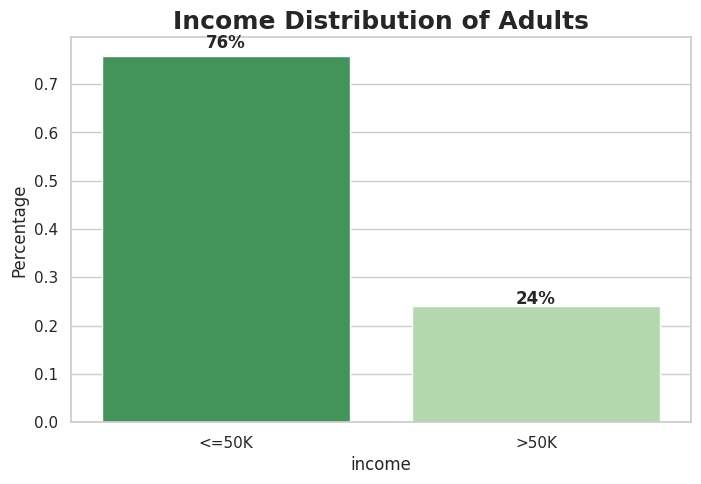

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

Bu grafik, farklı gelir düzeylerine sahip bireylerin oranlarını gösterir.


**Farklı Yaş Gruplarındaki Bireylerin Gelir Dağılımı**

Bu bölümde, veri setindeki bireylerin farklı yaş gruplarına göre gelir dağılımlarını inceledik. Amacımız, farklı yaş gruplarındaki bireylerin hangi gelir düzeylerine sahip olduğunu anlamaktı. Bu amaçla, yaş gruplarına göre bir sayım çubuk grafiği oluşturduk.

İlk olarak, her bir bireyin yaşını kullanarak yaş gruplarını belirledik. Bu işlem için bir Python fonksiyonu tanımladık. Bu fonksiyon, her bir bireyin yaşını alır ve yaş aralığına göre bireyin hangi yaş grubuna ait olduğunu belirler.

Daha sonra, bu yaş gruplarına göre veri setimizi "uzun formata" dönüştürdük. Bu, her bir bireyin yaş grubu ve gelir düzeyi ile ilişkilendirildiği bir veri yapısı oluşturdu.

Son olarak, seaborn kütüphanesinin countplot() fonksiyonunu kullanarak yaş gruplarına göre gelir dağılımını gösteren bir çubuk grafiği oluşturduk. Bu grafik, farklı yaş gruplarındaki bireylerin farklı gelir düzeylerine sahip olma dağılımlarını gösterir.

Bu analiz, veri setindeki bireylerin gelir dağılımlarını yaş gruplarına göre inceleyerek farklı yaş grupları arasındaki gelir eğilimlerini anlamamıza yardımcı oldu. Bu bilgi, yaş gruplarına göre gelir dağılımının genel bir görünümünü sağlar ve veri setinin demografik yapısal özelliklerini anlamamıza yardımcı olur.

In [14]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

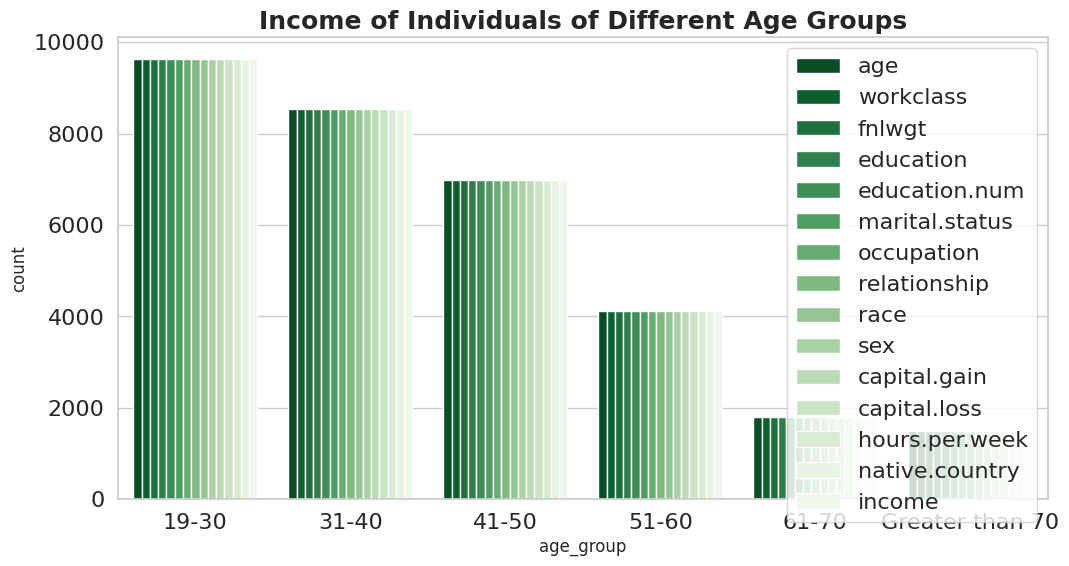

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert income to a categorical variable
df['income'] = pd.Categorical(df['income'])

# Convert the data to a long format
df_long = pd.melt(df, id_vars=['age_group'], var_name='income')

# Create the countplot
plt.figure(figsize=(12, 6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(data=df_long, x='age_group', hue='income', palette='Greens_r', order=order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

**Grafiğin Yorumu**

Oluşturulan grafikten elde edilen bulgular aşağıda özetlenmiştir:

**19-30 ve 31-40 Yaş Grupları:** Bu yaş gruplarında, genellikle 50 bin doların altında gelir elde eden bireylerin sayısı daha fazladır.

**41-50 ve 51-60 Yaş Grupları:** Bu yaş gruplarında, gelir seviyeleri daha dengelidir ve 50 bin doların üstünde gelir elde edenlerin sayısı artmaktadır.

**61-70 ve 70'den Büyük Yaş Grupları:** Bu yaş gruplarında, genellikle 50 bin doların altında gelir elde eden bireylerin sayısı daha fazladır. Ancak, 70'den büyük yaş gruplarında gelir dağılımı daha geniş bir yelpazeye sahiptir.

Bu analiz, farklı yaş gruplarındaki bireylerin gelir dağılımlarını inceleyerek yaş ile gelir arasındaki ilişkiyi anlamamıza yardımcı oldu. Bu bilgi, yaş grubuna göre gelir dağılımının genel bir görünümünü sağlar ve veri setinin demografik yapısal özelliklerini anlamamıza yardımcı olur. Ayrıca, yaşın gelir üzerindeki etkilerini değerlendirmek, sosyal ve ekonomik politikaların planlanmasında önemli bir faktördür.


**Farklı Eğitim Seviyelerindeki Bireylerin Geliri**

Bu bölümde, veri setindeki bireylerin farklı eğitim seviyelerine göre gelir dağılımlarını inceledik. Amacımız, farklı eğitim seviyelerine sahip bireylerin hangi gelir düzeylerine sahip olduğunu anlamaktı. Bu amaçla, eğitim seviyelerine göre bir sayım çubuk grafiği oluşturduk.

İlk adımda, her bir bireyin eğitim seviyesini belirlemek için bir Python fonksiyonu tanımladık. Bu fonksiyon, her bir bireyin eğitim seviyesini alır ve bu eğitim seviyesine göre bireyin hangi kategoriye ait olduğunu belirler.

Daha sonra, bu eğitim seviyelerine göre veri setimizi "uzun formata" dönüştürdük. Bu, her bir bireyin eğitim seviyesi ve gelir düzeyi ile ilişkilendirildiği bir veri yapısı oluşturdu.

Son olarak, seaborn kütüphanesinin countplot() fonksiyonunu kullanarak eğitim seviyelerine göre gelir dağılımını gösteren bir çubuk grafiği oluşturduk. Bu grafik, farklı eğitim seviyelerindeki bireylerin farklı gelir düzeylerine sahip olma dağılımlarını gösterir.

Bu analiz, farklı eğitim seviyelerindeki bireylerin gelir dağılımlarını inceleyerek eğitim seviyesi ile gelir arasındaki ilişkiyi anlamamıza yardımcı oldu. Bu bilgi, eğitim seviyesine göre gelir dağılımının genel bir görünümünü sağlar ve veri setinin demografik yapısal özelliklerini anlamamıza yardımcı olur

In [16]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

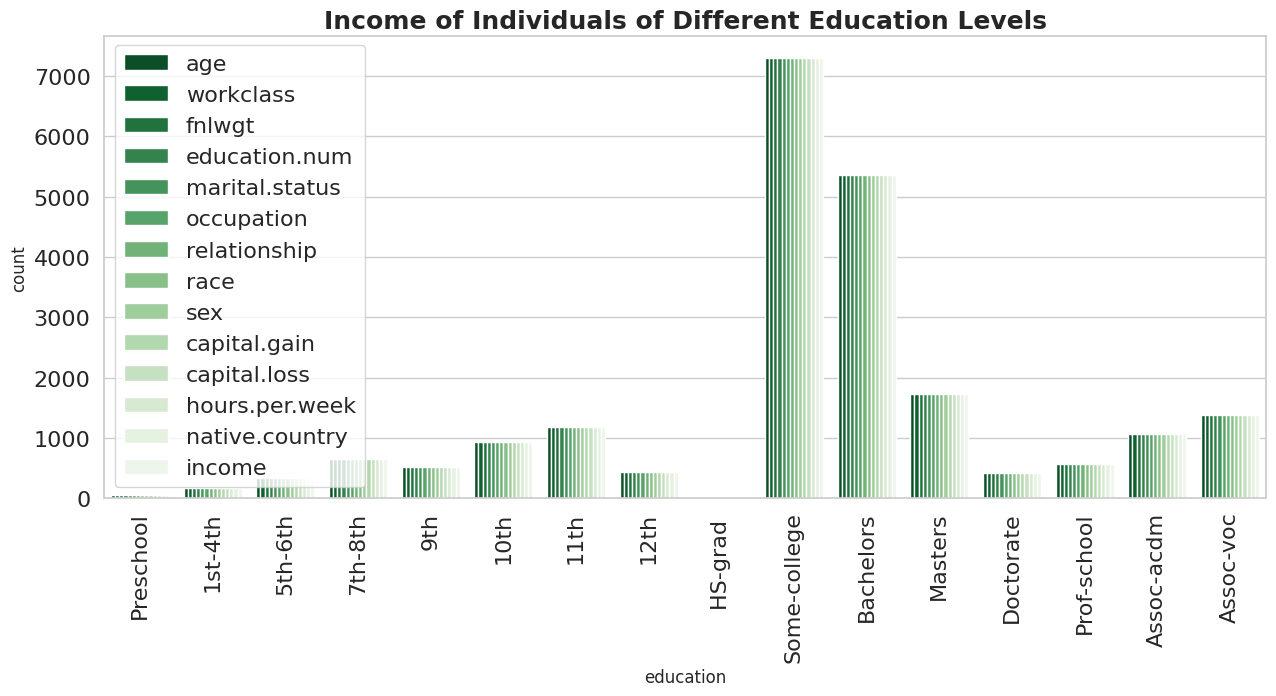

In [50]:
# Convert the data to a long format
df_long = pd.melt(df, id_vars=['education'], var_name='income')

# Create the countplot
plt.figure(figsize=(15,6))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school',
              'Assoc-acdm', 'Assoc-voc']
sns.countplot(data=df_long, x='education', hue='income', palette='Greens_r', order= order_list)
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

**Grafik Yorumu**

Grafikten elde edilen bulgulara göre şu detaylı yorumlar yapılabilir:

**Doktora ve Profesyonel Okul Mezunları:** Bu eğitim seviyelerine sahip bireyler genellikle yüksek gelir seviyelerine sahiptir. Doktora ve profesyonel okul mezunlarının büyük çoğunluğu 50 bin doların üstünde gelir elde etmektedir.

**Ortaokul ve Lise Mezunları:** Bu gruplar arasında gelir dağılımı genellikle daha düşüktür ve büyük bir kısmı 50 bin doların altında gelir elde etmektedir.

**Lisans ve Yüksek Lisans Mezunları:** Bu eğitim seviyelerine sahip bireyler arasında gelir dağılımı daha geniş olup, her iki gelir seviyesine de sahip bireyler bulunmaktadır. Ancak, lisans ve yüksek lisans mezunlarının çoğunluğu orta düzey gelir seviyelerine sahiptir.

Bu analiz, eğitim seviyesi ile gelir düzeyi arasındaki ilişkiyi açıklığa kavuşturarak, eğitimin bireylerin ekonomik durumunu nasıl etkilediğini göstermektedir. Bu tür analizler, eğitim politikalarının ve ekonomik fırsatların etkilerini değerlendirmek için önemlidir.

**Farklı Medeni Durumlardaki Bireylerin Geliri**

Bu bölümde, veri setindeki bireylerin farklı medeni durumlarına göre gelir dağılımlarını inceledik. Amacımız, farklı medeni durumlarına sahip bireylerin hangi gelir düzeylerine sahip olduğunu anlamaktı. Bu amaçla, medeni durumlarına göre bir sayım çubuk grafiği oluşturduk.

İlk adımda, her bir bireyin medeni durumunu belirlemek için veri setini uzun formata dönüştürdük. Bu dönüşüm, veri setindeki farklı gelir durumlarının ("<=50K" ve ">50K") tek bir sütunda toplanmasını sağladı ve "marital.status" sütunu kimlik değişkeni (id_vars) olarak kullanıldı.

Daha sonra, seaborn kütüphanesinin countplot() fonksiyonunu kullanarak medeni durumlarına göre gelir dağılımını gösteren bir çubuk grafiği oluşturduk. Bu grafik, farklı medeni durumlardaki bireylerin farklı gelir düzeylerine sahip olma dağılımlarını göstermektedir.

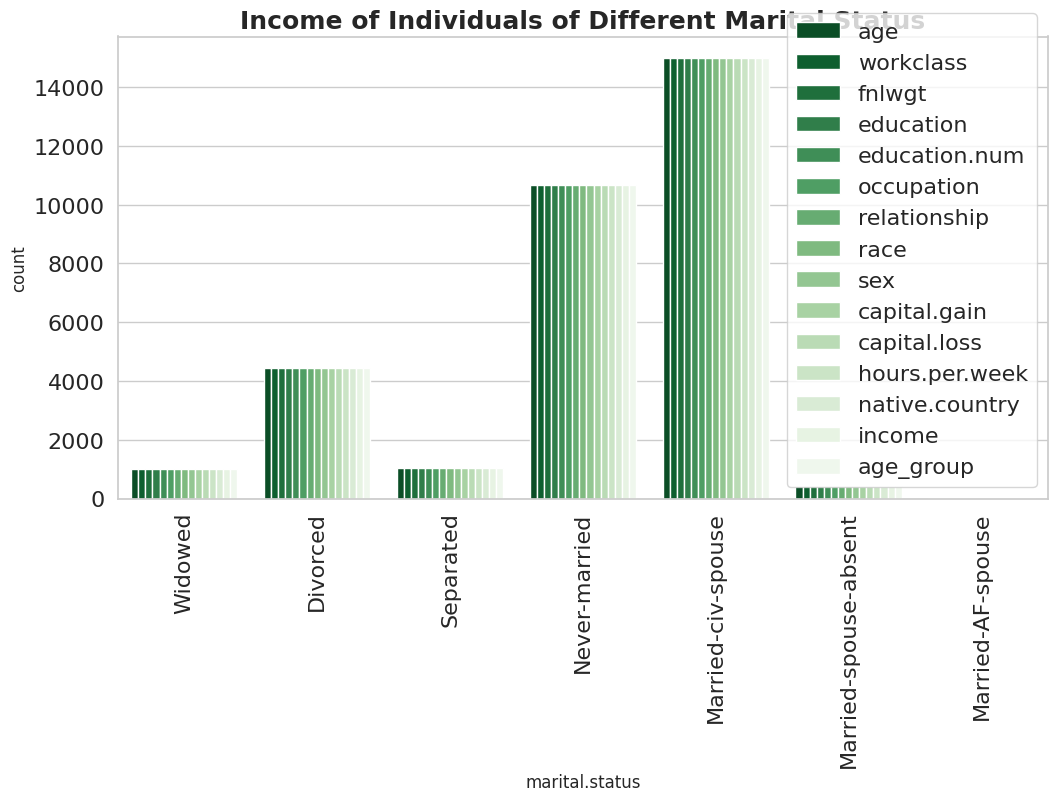

In [18]:
# Melt the dataframe to convert it to a long format
df_long = pd.melt(df, id_vars=['marital.status'], var_name='income')

# Create the countplot
plt.figure(figsize=(12,6))
sns.countplot(data=df_long, x='marital.status', hue='income', palette='Greens_r')
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

**Grafik Yorumu**

Oluşturulan grafikten elde edilen bulgular aşağıda özetlenmiştir:

**Medeni Durum ve Gelir Dağılımı:** Grafikte, her medeni durum kategorisi için 50 bin doların altında ve üstünde gelir elde eden bireylerin sayısı gösterilmiştir.

**Evli Bireyler:** Evli bireyler (özellikle "Married-civ-spouse") arasında 50 bin doların üstünde gelir elde edenlerin sayısı, diğer medeni durumlara göre daha fazladır. Bu durum, evli bireylerin genellikle daha yüksek  gelir elde etme eğiliminde olduğunu göstermektedir.

**Bekar ve Ayrılmış Bireyler:** Bekar ("Never-married") ve ayrılmış ("Divorced", "Separated") bireylerin çoğunluğu 50 bin doların altında gelir elde etmektedir. Bu durum, bu grupların daha düşük gelir seviyelerine sahip olduğunu göstermektedir .

 **Dul Bireyler:** Dul ("Widowed") bireyler arasında da 50 bin doların altında gelir elde edenlerin sayısı fazladır. Ancak, bu grupta gelir dağılımı diğer medeni durumlara göre daha dengeli görünmektedir.

**Sonuç**

 Bu analiz, medeni durumun bireylerin gelir durumları üzerinde önemli bir etkisi olduğunu göstermektedir. Evli bireyler genellikle daha yüksek gelir elde ederken, bekar ve ayrılmış bireyler genellikle daha düşük gelir seviyelerine sahiptir. Bu bulgular, sosyal ve ekonomik politikaların şekillendirilmesinde dikkate alınabilir.


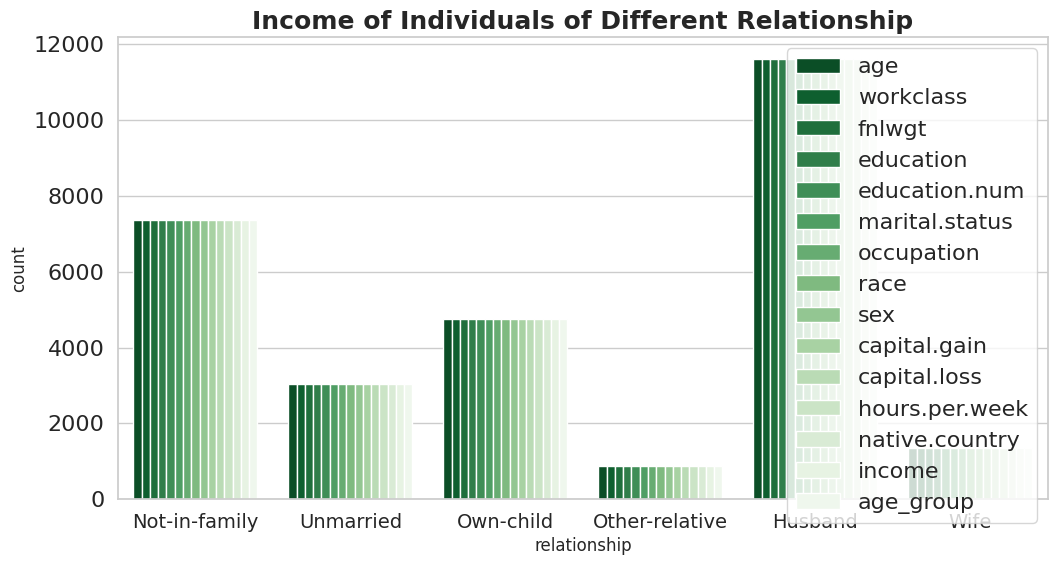

In [27]:
# Convert the data to a long format
df_long = pd.melt(df, id_vars=['relationship'], var_name='income')

# Create the countplot
plt.figure(figsize=(12,6))
sns.countplot(data=df_long, x='relationship', hue='income', palette='Greens_r')
plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

**Grafiğin Yorumu**

Oluşturulan grafikten elde edilen bulgular aşağıda özetlenmiştir:

**Evli Bireyler:** Evli bireylerin (özellikle "Married-civ-spouse") genellikle 50 bin doların üstünde gelir elde etme eğiliminde olduğu görülmektedir. Bu durum, evli bireylerin genellikle daha yüksek gelir elde etme eğiliminde olduğunu göstermektedir.

**Bekar Bireyler:** Bekar bireylerin (örneğin, "Never-married") çoğunluğu 50 bin doların altında gelir elde etmektedir. Bu, bekâr bireylerin genellikle daha düşük gelir seviyelerine sahip olduğunu göstermektedir.

**Aile İçi İlişkiler:** Diğer ilişki türlerinde ("Husband", "Wife", "Own-child", "Other-relative") de genellikle 50 bin doların altında gelir elde eden bireylerin sayısı fazladır.

Bu analiz, farklı ilişki türlerindeki bireylerin gelir dağılımlarını inceleyerek ilişki türü ile gelir arasındaki ilişkiyi anlamamıza yardımcı oldu. Bu bilgi, ilişki türüne göre gelir dağılımının genel bir görünümünü sağlar ve veri setinin demografik yapısal özelliklerini anlamamıza yardımcı olur. Ayrıca, bu tür analizler, aile yapılarının ve sosyal ilişkilerin ekonomik durum üzerindeki etkilerini değerlendirmemize yardımcı olabilir.








**Farklı Irklardaki Bireylerin Geliri**

Bu bölümde, veri setindeki bireylerin farklı ırklara göre gelir dağılımlarını inceledik. Amacımız, farklı ırklara sahip bireylerin hangi gelir düzeylerine sahip olduğunu anlamaktı. Bu amaçla, ırklarına göre bir sayım çubuk grafiği oluşturduk.

İlk adımda, veri setimizi analiz için uygun bir formata dönüştürdük. Bunu yaparken, veri setindeki "race" sütununu kimlik değişkeni (id_vars) olarak kullanarak ve gelir değişkenlerini ("<=50K" ve ">50K") uzun formata çevirerek gerçekleştirdik. Bu dönüşüm, her bir bireyin ırkı ve gelir düzeyi ile ilişkilendirildiği bir veri yapısı oluşturdu.

Daha sonra, seaborn kütüphanesinin countplot() fonksiyonunu kullanarak ırklarına göre gelir dağılımını gösteren bir çubuk grafiği oluşturduk. Bu grafik, farklı ırklardaki bireylerin farklı gelir düzeylerine sahip olma dağılımlarını göstermektedir.

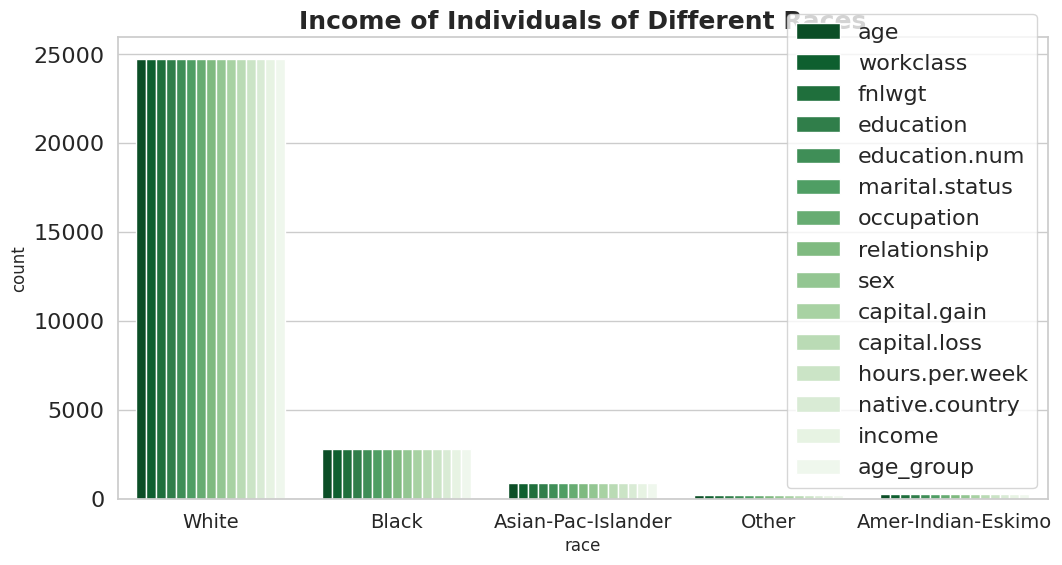

In [28]:
# Convert the data to a long format
df_long = pd.melt(df, id_vars=['race'], var_name='income')

# Create the countplot
plt.figure(figsize=(12,6))
sns.countplot(data=df_long, x='race', hue='income', palette='Greens_r')
plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

**Grafiğin Yorumu**

Oluşturulan grafikten elde edilen bulgular aşağıda özetlenmiştir:

**Beyaz Bireyler:** Beyaz ("White") bireyler arasında 50 bin doların üstünde gelir elde edenlerin sayısı diğer ırklara göre daha fazladır. Bu durum, beyaz bireylerin genellikle daha yüksek gelir elde etme eğiliminde olduğunu göstermektedir.

**Siyah ve Asyalı Bireyler:** Siyah ("Black") ve Asyalı ("Asian-Pac-Islander") bireyler arasında da 50 bin doların üstünde gelir elde edenler bulunmaktadır, ancak bu gruplar arasında 50 bin doların altında gelir elde edenlerin sayısı daha fazladır.

**Diğer Irklar:** Diğer ırklar ("Amer-Indian-Eskimo" ve "Other") arasında 50 bin doların altında gelir elde eden bireylerin sayısı belirgin şekilde fazladır.

Bu analiz, farklı ırklardaki bireylerin gelir dağılımlarını inceleyerek ırk ile gelir arasındaki ilişkiyi anlamamıza yardımcı oldu. Bu bilgi, ırkına göre gelir dağılımının genel bir görünümünü sağlar ve veri setinin demografik yapısal özelliklerini anlamamıza yardımcı olur. Ayrıca, bu tür analizler sosyal ve ekonomik eşitsizliklerin tespit edilmesine ve bu eşitsizliklerin giderilmesine yönelik politikaların geliştirilmesine katkı sağlayabilir.

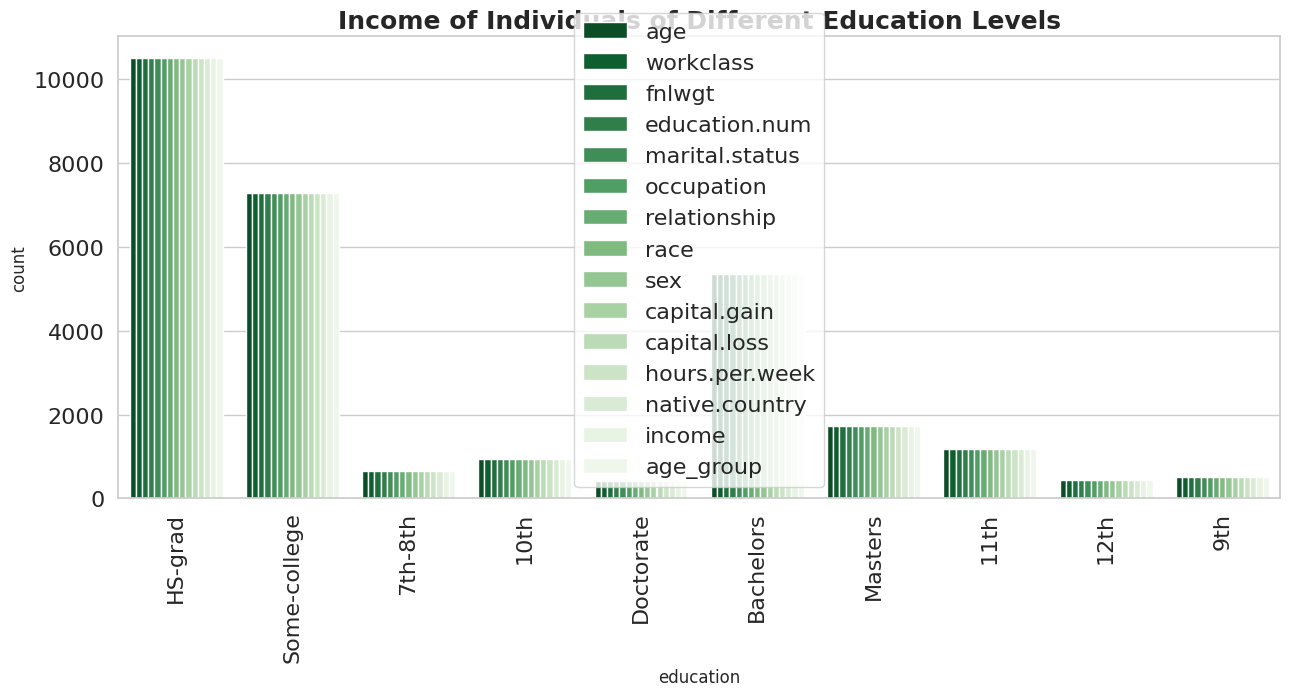

In [32]:
# Convert the data to a long format
df_long = pd.melt(df, id_vars=['education'], var_name='income')

# Create the countplot
plt.figure(figsize=(15,6))
sns.countplot(data=df_long, x='education', hue='income', palette='Greens_r')
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

**Farklı Mesleklerdeki Bireylerin Geliri**

Bu bölümde, veri setindeki bireylerin farklı mesleklerine göre gelir dağılımlarını inceledik. Amacımız, farklı mesleklere sahip bireylerin hangi gelir düzeylerine sahip olduğunu anlamaktı. Bu amaçla, mesleklere göre bir sayım çubuk grafiği oluşturduk.

İlk adımda, veri setimizi analiz için uygun bir formata dönüştürdük. Bunu yaparken, veri setindeki "occupation" sütununu kimlik değişkeni (id_vars) olarak kullanarak ve gelir değişkenlerini ("<=50K" ve ">50K") uzun formata çevirerek gerçekleştirdik. Bu dönüşüm, her bir bireyin mesleği ve gelir düzeyi ile ilişkilendirildiği bir veri yapısı oluşturdu.

Daha sonra, seaborn kütüphanesinin countplot() fonksiyonunu kullanarak mesleklerine göre gelir dağılımını gösteren bir çubuk grafiği oluşturduk. Bu grafik, farklı mesleklerdeki bireylerin farklı gelir düzeylerine sahip olma dağılımlarını göstermektedir.

In [38]:
df_long = pd.melt(df, id_vars=['occupation'], var_name='income')


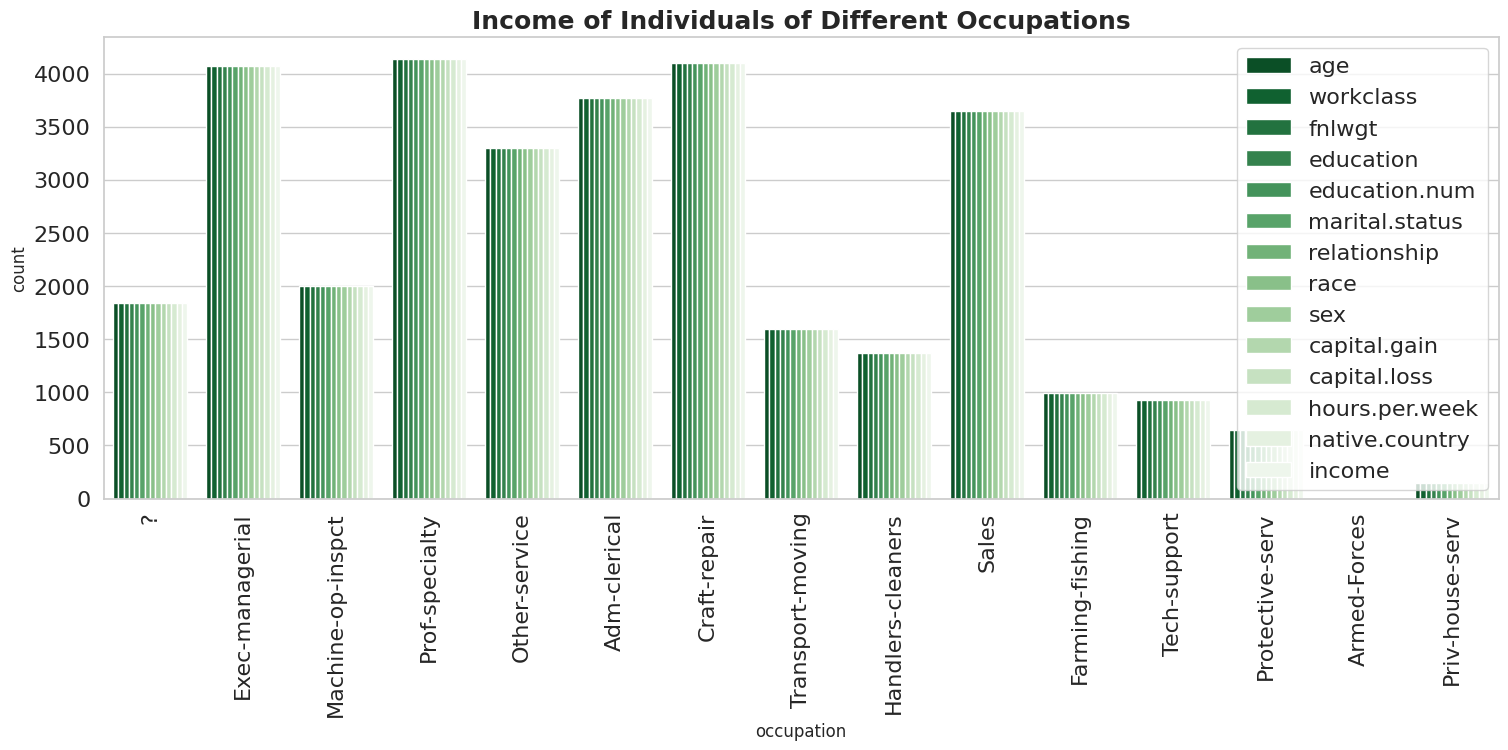

In [39]:
plt.figure(figsize=(18,6))
sns.countplot(data=df_long, x='occupation', hue='income', palette='Greens_r')
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

**Grafiğin Yorumu**

Oluşturulan grafikten elde edilen bulgular aşağıda özetlenmiştir:

**Üst Düzey Meslekler**: Üst düzey meslekler (örneğin, "Exec-managerial" ve "Prof-specialty") arasında 50 bin doların üstünde gelir elde edenlerin sayısı oldukça fazladır. Bu durum, bu mesleklerde çalışan bireylerin genellikle daha yüksek gelir elde etme eğiliminde olduğunu göstermektedir.

**Mavi Yaka İşler:** Mavi yaka işler (örneğin, "Craft-repair" ve "Transport-moving") arasında 50 bin doların altında gelir elde edenlerin sayısı daha fazladır. Ancak, bu gruplarda da 50 bin doların üstünde gelir elde eden bireyler bulunmaktadır


**Düşük Gelirli Meslekler:** Düşük gelirli meslekler (örneğin, "Handlers-cleaners" ve "Other-service") arasında 50 bin doların altında gelir elde edenlerin sayısı belirgin şekilde fazladır. Bu mesleklerde çalışan bireylerin genellikle daha düşük gelir elde ettiği görülmektedir.

Bu analiz, farklı mesleklerdeki bireylerin gelir dağılımlarını inceleyerek meslek ile gelir arasındaki ilişkiyi anlamamıza yardımcı oldu. Bu bilgi, mesleğine göre gelir dağılımının genel bir görünümünü sağlar ve veri setinin demografik yapısal özelliklerini anlamamıza yardımcı olur. Ayrıca, bu tür analizler, mesleki eğitim ve kariyer planlama politikalarının geliştirilmesine yönelik önemli bilgiler sağlayabilir.








**Korelasyon Tablosunun Elde Edilmesi**

Bu bölümde, veri setindeki bazı sayısal değişkenler arasındaki korelasyonları hesaplayarak bir korelasyon tablosu oluşturduk. Bu tablonun amacı, bu değişkenlerin birbirleriyle nasıl ilişkilendiğini anlamaktır.

İlk adımda, veri setindeki gelir değişkenini kategorik değerlerden sayısal değerlere dönüştürdük. Gelir değişkeni <=50K ve >50K değerlerini sırasıyla 0 ve 1 olarak değiştirdik.

Ardından, veri setini pandas DataFrame'e yükledik ve sütun adlarındaki kısa çizgileri (hyphens) kaldırarak daha uygun sütun adları belirledik. Bu adım, veri manipülasyonunu daha kolay hale getirmek için yapılmıştır.

Daha sonra, yaş (age), son ağırlık (fnlwgt), eğitim seviyesi (education.num), sermaye kazancı (capital.gain), sermaye kaybı (capital.loss) ve haftalık çalışma saati (hours.per.week) gibi değişkenler arasındaki korelasyonları hesapladık. Korelasyon matrisi, bu değişkenlerin birbirleriyle olan doğrusal ilişkisini gösterir.

Son olarak, bu korelasyon matrisini bir ısı haritası (heatmap) kullanarak görselleştirdik. Isı haritası, korelasyon değerlerinin görsel bir temsilini sunar ve hangi değişkenlerin birbiriyle ne kadar güçlü bir ilişkiye sahip olduğunu kolayca görmemizi sağlar.

In [40]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


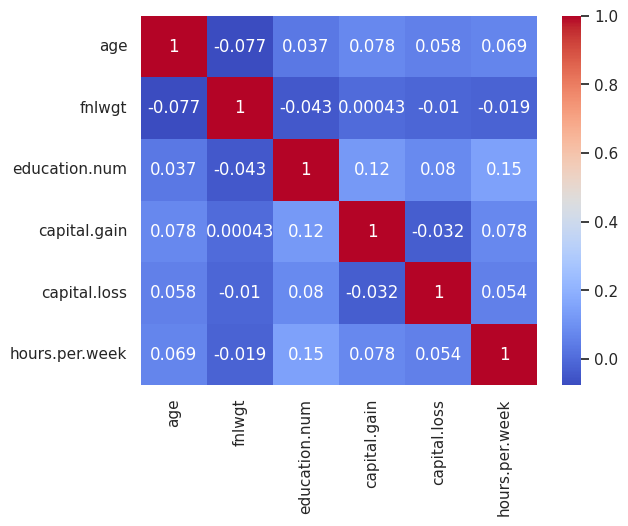

In [42]:
# Load the data into a pandas DataFrame
df = pd.read_csv('/adult.csv')

# Rename the columns to remove hyphens
df.rename(columns={
    'education-num': 'education.num',
    'capital-gain': 'capital.gain',
    'capital-loss': 'capital.loss',
    'hours-per-week': 'hours.per.week'
}, inplace=True)

# Check the column names of the DataFrame
print(df.columns)

# Calculate the correlation matrix using the correct column names
corr_matrix = df[['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']].corr()

# Create a heatmap from the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

**Korelasyon Tablosunun Yorumu**

Oluşturulan korelasyon tablosundan elde edilen bulgular aşağıda özetlenmiştir:

**Yaş (age) ve Eğitim Seviyesi (education.num):** Yaş ile eğitim seviyesi arasında pozitif bir korelasyon bulunmaktadır. Bu, yaşlandıkça bireylerin daha yüksek eğitim seviyelerine sahip olma eğiliminde olduğunu gösterir.

**Sermaye Kazancı (capital.gain) ve Sermaye Kaybı (capital.loss):** Sermaye kazancı ile sermaye kaybı arasında negatif bir korelasyon bulunmaktadır. Bu, sermaye kazancı yüksek olan bireylerin genellikle sermaye kaybının düşük olduğunu ve tam tersi durumun geçerli olduğunu gösterir.

**Haftalık Çalışma Saati (hours.per.week) ve Eğitim Seviyesi (education.num):** Haftalık çalışma saati ile eğitim seviyesi arasında zayıf bir pozitif korelasyon bulunmaktadır. Bu, eğitim seviyesi yüksek olan bireylerin genellikle haftada daha fazla saat çalıştığını göstermektedir.

**Son Ağırlık (fnlwgt):** Son ağırlık değişkeni, diğer değişkenlerle zayıf korelasyonlar göstermektedir. Bu değişkenin diğer değişkenlerle olan ilişkisi belirgin değildir.

Bu analiz, veri setindeki bazı önemli değişkenler arasındaki ilişkileri anlamamıza yardımcı olmuştur. Bu tür analizler, veri setinin yapısını daha iyi kavramamıza ve daha ileri analizler için önemli bilgileri elde etmemize olanak sağlar. Korelasyon değerlerinin yorumlanması, veri setindeki potansiyel ilişki ve trendleri keşfetmek için önemli bir adımdır.






